# Car Price Prediction.

Source : Kaggle

### PROBLEM STATEMENT :

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Importing Library's

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame , Series
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error ,mean_absolute_error
from sklearn.model_selection import GridSearchCV

### Importing the datasets

In [3]:
train = pd.read_csv("Train_cars.csv")
test = pd.read_csv("Test_cars.csv")

In [4]:
train.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti 800 Std BSIII,Bangalore,2012,33715,Diesel,Manual,First,16.46 kmpl,1248 CC,100 bhp,5.0,43.65 Lakh,25.53
1,Honda City 1.5 V AT,Delhi,2013,73977,Diesel,Manual,First,18.6 kmpl,2993 CC,61 bhp,4.0,NaN,4.58
2,Honda CR-V RVi MT,Delhi,2007,16460,CNG,Manual,Third,15.3 kmpl,1599 CC,140 bhp,5.0,NaN,2.37
3,Skoda Yeti Ambition 4X2,Kolkata,2009,35048,Petrol,Manual,First,25.47 kmpl,1196 CC,86.8 bhp,5.0,NaN,1.20
4,Hyundai i10 Magna LPG,Coimbatore,2013,41656,Petrol,Automatic,First,19.12 kmpl,1999 CC,115 bhp,7.0,13.26 Lakh,33.04


In [5]:
test.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Ford Figo Diesel Titanium,Delhi,2010,48928,Diesel,Automatic,First,17.8 kmpl,1248 CC,258 bhp,7.0,NaN
1,Maruti SX4 VDI,Jaipur,2011,47428,Diesel,Automatic,First,23.9 kmpl,2498 CC,183 bhp,5.0,4.33 Lakh
2,Hyundai Creta 1.6 SX Option,Bangalore,2014,28984,Petrol,Automatic,First,19.59 kmpl,2494 CC,203 bhp,5.0,71.15 Lakh
3,Jeep Compass 2.0 Limited 4X4,Kochi,2017,46735,Petrol,Manual,First,23.9 kmpl,1498 CC,215 bhp,5.0,NaN
4,Maruti Swift Dzire VDI,Kochi,2015,19975,Petrol,Automatic,First,26.6 km/kg,2993 CC,147.8 bhp,7.0,NaN


In [6]:
train.isna().sum() , test.isna().sum()

(Name                     0
 Location                 0
 Year                     0
 Kilometers_Driven        0
 Fuel_Type                0
 Transmission             0
 Owner_Type               0
 Mileage                 92
 Engine                  37
 Power                   85
 Seats                   92
 New_Price            18619
 Price                    0
 dtype: int64,
 Name                     0
 Location                 0
 Year                     0
 Kilometers_Driven        0
 Fuel_Type                0
 Transmission             0
 Owner_Type               0
 Mileage                249
 Engine                  69
 Power                  232
 Seats                  246
 New_Price            43315
 dtype: int64)

### Since Null value are in same columns in both dataset.. let's concat both datasets. 

In [7]:
combi = pd.concat([train, test], ignore_index=True)

In [8]:
combi.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti 800 Std BSIII,Bangalore,2012,33715,Diesel,Manual,First,16.46 kmpl,1248 CC,100 bhp,5.0,43.65 Lakh,25.53
1,Honda City 1.5 V AT,Delhi,2013,73977,Diesel,Manual,First,18.6 kmpl,2993 CC,61 bhp,4.0,NaN,4.58
2,Honda CR-V RVi MT,Delhi,2007,16460,CNG,Manual,Third,15.3 kmpl,1599 CC,140 bhp,5.0,NaN,2.37
3,Skoda Yeti Ambition 4X2,Kolkata,2009,35048,Petrol,Manual,First,25.47 kmpl,1196 CC,86.8 bhp,5.0,NaN,1.20
4,Hyundai i10 Magna LPG,Coimbatore,2013,41656,Petrol,Automatic,First,19.12 kmpl,1999 CC,115 bhp,7.0,13.26 Lakh,33.04


In [9]:
combi.tail(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
74995,Honda Mobilio S i DTEC,Kolkata,2014,59533,Diesel,Manual,First,16.09 kmpl,1248 CC,null bhp,8.0,NaN,NaN
74996,Toyota Etios Liva 1.2 G,Kochi,2017,56122,Diesel,Manual,First,12.6 kmpl,1591 CC,85.8 bhp,5.0,1.36 Cr,NaN
74997,Maruti Zen LX,Hyderabad,2012,57365,Diesel,Manual,First,22.0 kmpl,2993 CC,174.3 bhp,5.0,10.04 Lakh,NaN
74998,Toyota Innova 2.5 VX (Diesel) 7 Seater,Hyderabad,2012,33307,Diesel,Manual,First,10.98 kmpl,1995 CC,112 bhp,5.0,NaN,NaN
74999,Toyota Etios G,Kolkata,2017,43949,Petrol,Manual,First,14.0 kmpl,1798 CC,488.1 bhp,5.0,NaN,NaN


In [10]:
combi.shape , train.shape , test.shape

((75000, 13), (22500, 13), (52500, 12))

In [11]:
combi.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [12]:
combi.isna().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                341
Engine                 106
Power                  317
Seats                  338
New_Price            61934
Price                52500
dtype: int64

In [13]:
combi["Name"].unique()

array(['Maruti 800 Std BSIII', 'Honda City 1.5 V AT', 'Honda CR-V RVi MT',
       ..., 'Hyundai i20 2015-2017 Asta 1.2',
       'Hyundai Santro LP - Euro II', 'Maruti Ertiga VDI Limited Edition'],
      dtype=object)

In [14]:
a=combi["Name"]
b=[]

In [15]:
for i in a:
    b.append(i.split(' ')[0])

In [16]:
combi["Company"] = b

In [17]:
combi["Mileage"].unique()

array(['16.46 kmpl', '18.6 kmpl', '15.3 kmpl', '25.47 kmpl', '19.12 kmpl',
       '20.4 kmpl', '25.44 kmpl', '17.5 kmpl', '23.65 kmpl', '22.5 kmpl',
       '13.49 kmpl', '19.01 kmpl', '16.95 kmpl', '17.0 kmpl',
       '18.88 kmpl', '19.0 kmpl', '13.1 kmpl', '23.84 kmpl', '17.8 kmpl',
       '15.0 kmpl', '11.49 kmpl', '11.57 kmpl', '17.0 km/kg',
       '26.6 km/kg', '14.07 kmpl', '17.68 kmpl', '12.99 kmpl',
       '16.8 kmpl', '17.1 kmpl', '15.29 kmpl', '20.73 kmpl', '22.48 kmpl',
       '11.8 kmpl', '21.76 kmpl', '20.85 kmpl', '11.1 kmpl', '23.1 kmpl',
       '12.8 kmpl', '10.2 kmpl', '18.48 kmpl', nan, '15.17 kmpl',
       '33.44 km/kg', '13.5 kmpl', '19.81 kmpl', '15.6 kmpl',
       '15.04 kmpl', '17.01 kmpl', '15.97 kmpl', '14.8 kmpl',
       '21.27 kmpl', '18.9 kmpl', '10.5 kmpl', '23.19 kmpl', '18.3 kmpl',
       '19.1 kmpl', '17.4 kmpl', '12.07 kmpl', '24.0 kmpl', '11.5 kmpl',
       '22.3 kmpl', '24.07 kmpl', '13.7 kmpl', '16.6 kmpl', '15.87 kmpl',
       '26.2 km/kg', '17.9 kmp

In [18]:
combi.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company
0,Maruti 800 Std BSIII,Bangalore,2012,33715,Diesel,Manual,First,16.46 kmpl,1248 CC,100 bhp,5.0,43.65 Lakh,25.53,Maruti
1,Honda City 1.5 V AT,Delhi,2013,73977,Diesel,Manual,First,18.6 kmpl,2993 CC,61 bhp,4.0,NaN,4.58,Honda


In [19]:
combi["Transmission"].value_counts()

Manual       60107
Automatic    14893
Name: Transmission, dtype: int64

In [20]:
combi["Fuel_Type"].value_counts()

Petrol      33678
Diesel      33567
CNG          7648
LPG            57
Electric       50
Name: Fuel_Type, dtype: int64

### As lpg, and cng are almost same category in vehicles term.. bin them together.


In [21]:
combi['Fuel_Type'] = combi['Fuel_Type'].replace(["LPG","CNG"],"CNG" , method="str")

<AxesSubplot:>

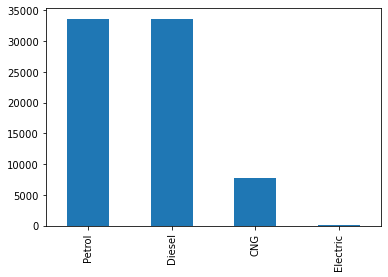

In [22]:
combi['Fuel_Type'].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

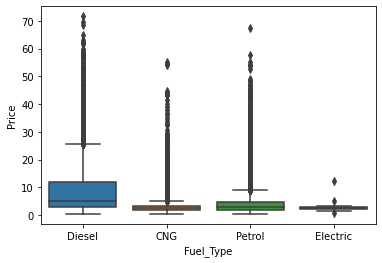

In [23]:
sns.boxplot(combi['Fuel_Type'] , train["Price"])

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

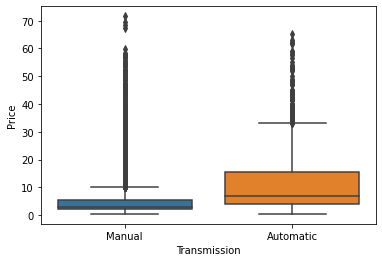

In [24]:
sns.boxplot(combi['Transmission'] , train["Price"])

In [25]:
combi["Owner_Type"].value_counts()

First             67452
Second             5647
Third              1736
Fourth & Above      165
Name: Owner_Type, dtype: int64

In [26]:
combi["Power"].value_counts()

58.16 bhp     4550
67.1 bhp      3014
null bhp      2316
121.3 bhp     1604
70 bhp        1549
              ... 
52.8 bhp        16
74.93 bhp       16
73.74 bhp       15
254 bhp         12
181.04 bhp       7
Name: Power, Length: 372, dtype: int64

In [27]:
combi["Engine"].value_counts()

998 CC     7398
1197 CC    6127
1498 CC    3900
1248 CC    3032
1198 CC    2627
           ... 
2694 CC      17
2200 CC      16
2495 CC      15
1489 CC      14
3200 CC      12
Name: Engine, Length: 146, dtype: int64

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

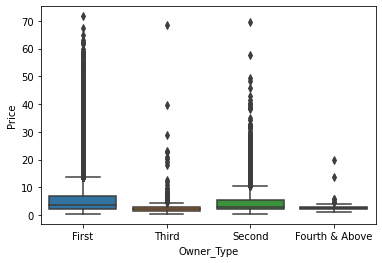

In [28]:
sns.boxplot(train["Owner_Type"] , train["Price"])

In [29]:
combi['Owner_Type']= combi['Owner_Type'].replace(["Fourth & Above","Third"],"Old car" , method="str")
        

In [30]:
combi['Year'].value_counts()

2013    13891
2012    10455
2014     8769
2009     8742
2010     8543
2011     8486
2015     4595
2017     3133
2007     2451
2016     2260
2006     1055
2008      967
2004      443
2005      427
2018      313
2003      305
2002      130
2001       31
2000        4
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='Price'>

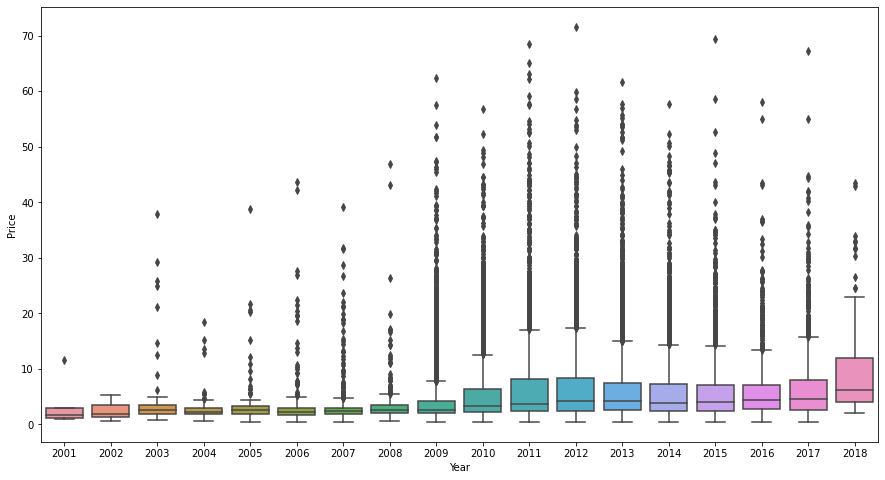

In [31]:
plt.figure(figsize =(15,8))
sns.boxplot(train["Year"] , train["Price"])

<AxesSubplot:xlabel='Location', ylabel='Price'>

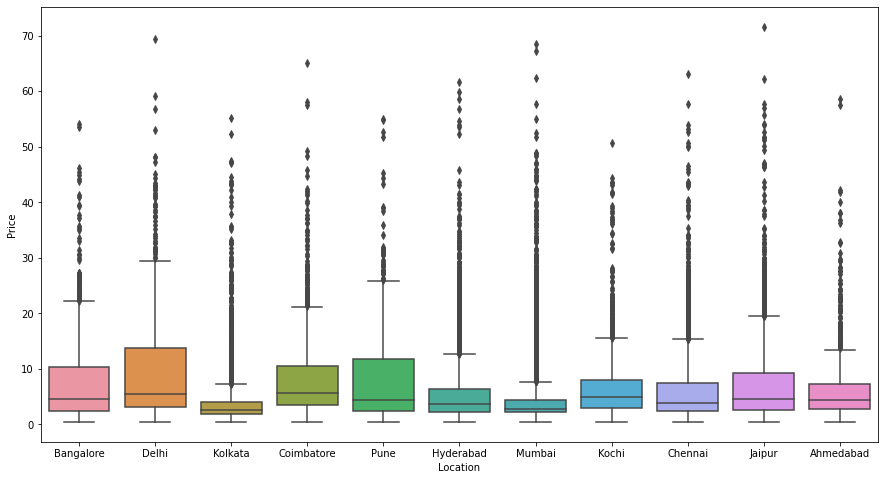

In [32]:
plt.figure(figsize =(15,8))
sns.boxplot(train["Location"] , train["Price"])

<AxesSubplot:xlabel='Seats', ylabel='Price'>

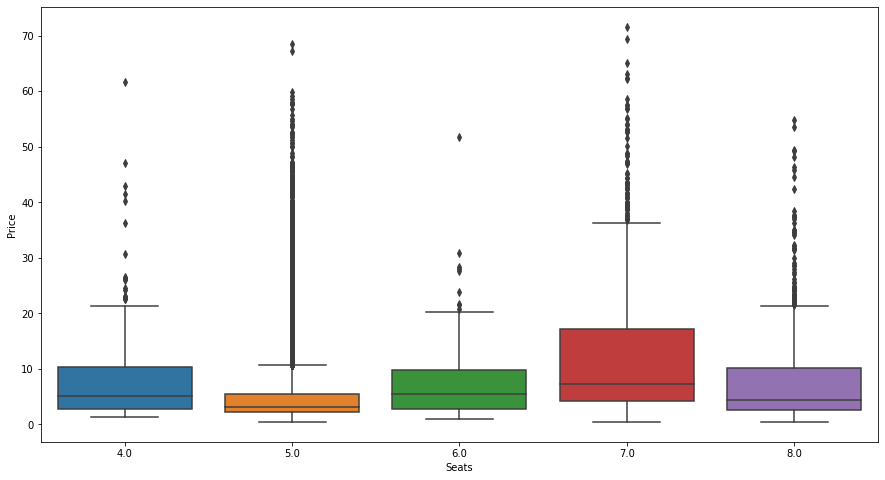

In [33]:
plt.figure(figsize =(15,8))
sns.boxplot(train["Seats"] , train["Price"])

<AxesSubplot:xlabel='Kilometers_Driven'>

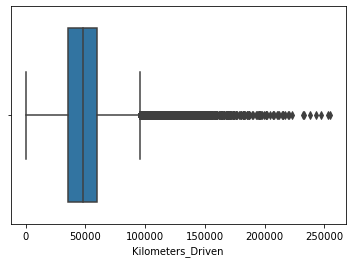

In [34]:
sns.boxplot(combi["Kilometers_Driven"])

## Treating NULL VALUES and Insignificant Entry..

1. Mileage

In [35]:
c=combi['Mileage']
d=[]
combi['Mileage'].replace({np.nan:'0 '},inplace=True)
for i in c:
    d.append((i.split(' '))[0])
    

In [36]:
e=[]
for i in d:
    e.append((float(i)))

In [37]:
combi['Mileage']=e

In [38]:
combi['Mileage'].replace({0:np.nan},inplace=True)


In [39]:
a=combi[combi['Mileage'].isnull()]['Name']
for i in a:
    combi['Mileage'].fillna((combi.groupby(combi['Name']==i)['Mileage'].mean()[1]),inplace=True)

2. Engine.

In [40]:
combi['Engine'].replace({np.nan:'0 '},inplace=True)
a=combi['Engine']
b=[]
c=[]

for i in a:
    b.append(i.split(' ')[0])
    

In [41]:
for i in b:
    c.append(int(i))

In [42]:
combi['Engine']=c

In [43]:
combi['Engine'].replace({0:np.nan},inplace=True)

In [44]:
b=combi[combi['Engine'].isnull()]['Name']
for i in b:
    combi['Engine'].fillna((combi.groupby(combi['Name']==i)['Engine'].mean()[1]),inplace=True)

3. Power

In [45]:
combi['Power'].replace({np.nan:'0 ','null bhp':'0.00 '},inplace=True)

In [46]:
a=combi['Power']
b=[]
c=[]

for i in a:
    b.append(i.split(' ')[0])

In [47]:
for i in b:
    c.append(float(i))

In [48]:
combi['Power']=c

In [49]:
combi['Power'].replace({0:np.nan},inplace=True)

In [50]:
c=combi[combi['Power'].isnull()]['Name']
for i in c:
    combi['Power'].fillna((combi.groupby(combi['Name']==i)['Power'].mean()[1]),inplace=True)

4. Seats

In [51]:
d=combi[combi['Seats'].isnull()]['Name']
for i in d:
    combi['Seats'].fillna((combi.groupby(combi['Name']==i)['Seats'].agg(pd.Series.mode)[1]),inplace=True)

In [52]:
combi.drop("New_Price", axis=1 , inplace= True)

In [53]:
combi.isna().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Price                52500
Company                  0
dtype: int64

In [54]:
combi.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Maruti 800 Std BSIII,Bangalore,2012,33715,Diesel,Manual,First,16.46,1248.0,100.0,5.0,25.53,Maruti
1,Honda City 1.5 V AT,Delhi,2013,73977,Diesel,Manual,First,18.60,2993.0,61.0,4.0,4.58,Honda
2,Honda CR-V RVi MT,Delhi,2007,16460,CNG,Manual,Old car,15.30,1599.0,140.0,5.0,2.37,Honda
3,Skoda Yeti Ambition 4X2,Kolkata,2009,35048,Petrol,Manual,First,25.47,1196.0,86.8,5.0,1.20,Skoda
4,Hyundai i10 Magna LPG,Coimbatore,2013,41656,Petrol,Automatic,First,19.12,1999.0,115.0,7.0,33.04,Hyundai


In [55]:
combi.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Company               object
dtype: object

In [56]:
combi['Year'] =combi['Year'].astype(object)
combi['Seats'] =combi['Seats'].astype(object)

In [57]:
combi.dtypes

Name                  object
Location              object
Year                  object
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                 object
Price                float64
Company               object
dtype: object

## Checking V_I_F Score....

In [58]:
df_num = combi.select_dtypes(np.number)

In [60]:
df_num.drop("Price" , axis=1 , inplace =True)

In [61]:
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(df_num.values,i) for i in range(df_num.shape[1])] 
vif['Features'] = df_num.columns
vif.sort_values('VIF_Factor', ascending=False).reset_index(drop=True)

,VIF_Factor,Features
0,7.803847,Mileage
1,5.722866,Engine
2,4.712641,Kilometers_Driven
3,3.995132,Power


<AxesSubplot:>

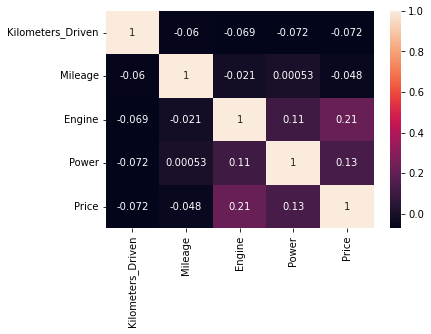

In [62]:
sns.heatmap(combi.corr() , annot =True)

In [63]:
combi.drop("Name" , axis=1 , inplace = True)

In [64]:
combi.dtypes

Location              object
Year                  object
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                 object
Price                float64
Company               object
dtype: object

In [65]:
combi1= pd.get_dummies(combi , drop_first=True)

In [66]:
combi.head(2)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Bangalore,2012,33715,Diesel,Manual,First,16.46,1248.0,100.0,5.0,25.53,Maruti
1,Delhi,2013,73977,Diesel,Manual,First,18.60,2993.0,61.0,4.0,4.58,Honda


In [67]:
combi1.head(2)

,Kilometers_Driven,Mileage,Engine,Power,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Company_Mini,Company_Mitsubishi,Company_Nissan,Company_Porsche,Company_Renault,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
0,33715,16.46,1248.0,100.0,25.53,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,73977,18.60,2993.0,61.0,4.58,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
newtrain = combi1.loc[0:train.shape[0]-1]
newtest = combi1.loc[train.shape[0]:, ]
newtest.drop("Price" , axis=1 , inplace=True)
newtrain.shape,newtest.shape,train.shape,test.shape

((22500, 70), (52500, 69), (22500, 13), (52500, 12))

In [69]:
x1 = newtrain.drop("Price" , axis =1 )
y1= newtrain["Price"]
x2= sm.add_constant(x1)
rf = sm.OLS(y1 ,x2).fit()
rf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     85.28
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:38:48   Log-Likelihood:                -74109.
No. Observations:               22500   AIC:                         1.484e+05
Df Residuals:                   22432   BIC:                         1.489e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.6724      0.597     12.859      0.000       6.503       8.842
Kilometers_Driven     -1.404e-05   2.14e-06     -6.561      0.000   -1.82e-05   -9.85e-06
Mileage                  -0.0404      0.009     -4.400      0.000      -0.058      -0.022
Engine                    0.0010   6.91e-05     14.330      0.000       0.001       0.001
Power                     0.0061      0.001      8.683      0.000       0.005       0.007
Location_Bangalore        0.0425      0.310      0.137      0.891      -0.565       0.650
Location_Chennai         -0.0615      0.285     -0.216      0.829      -0.619       0.496
Location_Coimbatore       0.8606      0.322      2.674      0.007       0.230       1.491
Location_Delhi            1.3600      0.303      4.482      0.000       0.765       1.955
Location_Hyderabad       -0.4281      0.273     -1.571      0.116      -0.962       0.106
Location_Jaipur           0.6887      0.297      2.320      0.020       0.107       1.271
Location_Kochi            0.0028      0.317      0.009      0.993      -0.618       0.624
Location_Kolkata         -0.8629      0.275     -3.141      0.002      -1.401      -0.324
Location_Mumbai          -0.2758      0.271     -1.019      0.308      -0.806       0.255
Location_Pune             1.0177      0.325      3.130      0.002       0.380       1.655
Year_2001                -0.1639      2.772     -0.059      0.953      -5.596       5.269
Year_2002                -1.5022      1.126     -1.334      0.182      -3.710       0.705
Year_2003                 0.7315      0.653      1.121      0.262      -0.548       2.011
Year_2004                -0.3633      0.572     -0.635      0.526      -1.485       0.759
Year_2005                 0.3642      0.593      0.614      0.539      -0.798       1.526
Year_2006                -0.4223      0.399     -1.059      0.290      -1.204       0.359
Year_2007                -0.3851      0.297     -1.296      0.195      -0.967       0.197
Year_2008                -0.1090      0.403     -0.271      0.787      -0.899       0.681
Year_2009                 0.3853      0.223      1.728      0.084      -0.052       0.822
Year_2010                 0.5305      0.223      2.374      0.018       0.093       0.968
Year_2011                 1.2190      0.224      5.436      0.000       0.779       1.659
Year_2012                 0.8089      0.219      3.697      0.000       0.380       1.238
Year_2013                 0.4821      0.211      2.280      0.023       0.068       0.897
Year_2014                 0.7194      0.223      3.221      0.001       0.282       1.157
Year_2015                 0.6059      0.251      2.417      0.016       0.115       1.097
Year_2016                 0.5484      0.302      1.814      0.070      -0.044       1.141
Year_2017              

### checking P_values < 0.05 for significant features..

In [74]:
pvalue=rf.pvalues
pval=pd.DataFrame(pvalue)
signi=pval[pval[0]<0.05].index

In [75]:
signi

Index(['const', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Jaipur',
       'Location_Kolkata', 'Location_Pune', 'Year_2010', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2017',
       'Year_2018', 'Fuel_Type_Diesel', 'Transmission_Manual',
       'Owner_Type_Old car', 'Seats_5.0', 'Seats_7.0', 'Company_Ford',
       'Company_Honda', 'Company_Hyundai', 'Company_ISUZU', 'Company_Mahindra',
       'Company_Mini', 'Company_Renault', 'Company_Tata', 'Company_Toyota'],
      dtype='object')

### O.L.S Model with Significant Features..


In [83]:
signi = newtrain[['Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Jaipur',
       'Location_Kolkata', 'Location_Pune', 'Year_2010', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2017',
       'Year_2018', 'Fuel_Type_Diesel', 'Transmission_Manual',
       'Owner_Type_Old car', 'Seats_5.0', 'Seats_7.0', 'Company_Ford',
       'Company_Honda', 'Company_Hyundai', 'Company_ISUZU', 'Company_Mahindra',
       'Company_Mini', 'Company_Renault', 'Company_Tata', 'Company_Toyota']]

In [84]:
signi.shape

(22500, 31)

In [85]:

y1= newtrain["Price"]
x2= sm.add_constant(signi)
rf1 = sm.OLS(y1 ,x2).fit()
rf1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     182.7
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:05:05   Log-Likelihood:                -74132.
No. Observations:               22500   AIC:                         1.483e+05
Df Residuals:                   22468   BIC:                         1.486e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.4815      0.349     21.414      0.000       6.797       8.166
Kilometers_Driven   -1.554e-05   2.08e-06     -7.472      0.000   -1.96e-05   -1.15e-05
Mileage                -0.0395      0.009     -4.313      0.000      -0.057      -0.022
Engine                  0.0010   6.86e-05     14.615      0.000       0.001       0.001
Power                   0.0062      0.001      8.944      0.000       0.005       0.008
Location_Coimbatore     1.0809      0.212      5.105      0.000       0.666       1.496
Location_Delhi          1.5711      0.181      8.665      0.000       1.216       1.926
Location_Jaipur         0.9022      0.169      5.327      0.000       0.570       1.234
Location_Kolkata       -0.6425      0.125     -5.139      0.000      -0.888      -0.397
Location_Pune           1.2279      0.214      5.744      0.000       0.809       1.647
Year_2010               0.3379      0.159      2.122      0.034       0.026       0.650
Year_2011               1.0272      0.161      6.384      0.000       0.712       1.343
Year_2012               0.6230      0.152      4.090      0.000       0.324       0.922
Year_2013               0.2967      0.140      2.118      0.034       0.022       0.571
Year_2014               0.5193      0.159      3.262      0.001       0.207       0.831
Year_2015               0.4186      0.200      2.088      0.037       0.026       0.812
Year_2017               0.9618      0.240      4.012      0.000       0.492       1.432
Year_2018               2.8820      0.702      4.105      0.000       1.506       4.258
Fuel_Type_Diesel        2.7564      0.096     28.664      0.000       2.568       2.945
Transmission_Manual    -3.3398      0.117    -28.655      0.000      -3.568      -3.111
Owner_Type_Old car     -1.0969      0.278     -3.952      0.000      -1.641      -0.553
Seats_5.0              -1.4321      0.203     -7.045      0.000      -1.831      -1.034
Seats_7.0               1.6868      0.232      7.262      0.000       1.232       2.142
Company_Ford           -0.6230      0.211     -2.956      0.003      -1.036      -0.210
Company_Honda          -0.1374      0.156     -0.881      0.379      -0.443       0.168
Company_Hyundai        -0.3547      0.123     -2.892      0.004      -0.595      -0.114
Company_ISUZU          -4.0554      1.541     -2.631      0.009      -7.077      -1.034
Company_Mahindra       -0.3503      0.257     -1.362      0.173      -0.855       0.154
Company_Mini           -0.8322      0.548     -1.519      0.129      -1.906       0.242
Company_Renault        -0.3160      0.282     -1.122      0.262      -0.868       0.236
Company_Tata           -0.3039      0.264     -1.151      0.250      -0.822       0.214
Company_Toyota         -0.2776      0.164     -1.698      0.090      -0.598       0.043
===

In [86]:
pvalue=rf1.pvalues
pval=pd.DataFrame(pvalue)
signi1=pval[pval[0]<0.05].index
signi1

Index(['const', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Jaipur',
       'Location_Kolkata', 'Location_Pune', 'Year_2010', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2017',
       'Year_2018', 'Fuel_Type_Diesel', 'Transmission_Manual',
       'Owner_Type_Old car', 'Seats_5.0', 'Seats_7.0', 'Company_Ford',
       'Company_Hyundai', 'Company_ISUZU'],
      dtype='object')

In [88]:
signi2 = signi[['Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Jaipur',
       'Location_Kolkata', 'Location_Pune', 'Year_2010', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2017',
       'Year_2018', 'Fuel_Type_Diesel', 'Transmission_Manual',
       'Owner_Type_Old car', 'Seats_5.0', 'Seats_7.0', 'Company_Ford',
       'Company_Hyundai', 'Company_ISUZU']]

In [89]:
y1= newtrain["Price"]
x2= sm.add_constant(signi2)
rf1 = sm.OLS(y1 ,x2).fit()
rf1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     226.2
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:14:26   Log-Likelihood:                -74136.
No. Observations:               22500   AIC:                         1.483e+05
Df Residuals:                   22474   BIC:                         1.485e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.4012      0.348     21.276      0.000       6.719       8.083
Kilometers_Driven   -1.559e-05   2.08e-06     -7.497      0.000   -1.97e-05   -1.15e-05
Mileage                -0.0395      0.009     -4.318      0.000      -0.057      -0.022
Engine                  0.0010   6.86e-05     14.603      0.000       0.001       0.001
Power                   0.0062      0.001      8.913      0.000       0.005       0.008
Location_Coimbatore     1.0786      0.212      5.095      0.000       0.664       1.494
Location_Delhi          1.5648      0.181      8.630      0.000       1.209       1.920
Location_Jaipur         0.9065      0.169      5.353      0.000       0.575       1.238
Location_Kolkata       -0.6406      0.125     -5.124      0.000      -0.886      -0.396
Location_Pune           1.2274      0.214      5.743      0.000       0.808       1.646
Year_2010               0.3368      0.159      2.116      0.034       0.025       0.649
Year_2011               1.0245      0.161      6.367      0.000       0.709       1.340
Year_2012               0.6206      0.152      4.074      0.000       0.322       0.919
Year_2013               0.2926      0.140      2.088      0.037       0.018       0.567
Year_2014               0.5196      0.159      3.264      0.001       0.208       0.832
Year_2015               0.4165      0.200      2.078      0.038       0.024       0.809
Year_2017               0.9554      0.240      3.986      0.000       0.486       1.425
Year_2018               2.8769      0.702      4.098      0.000       1.501       4.253
Fuel_Type_Diesel        2.7560      0.096     28.663      0.000       2.568       2.945
Transmission_Manual    -3.3368      0.117    -28.638      0.000      -3.565      -3.108
Owner_Type_Old car     -1.1015      0.278     -3.969      0.000      -1.645      -0.557
Seats_5.0              -1.4315      0.203     -7.043      0.000      -1.830      -1.033
Seats_7.0               1.6922      0.232      7.287      0.000       1.237       2.147
Company_Ford           -0.5366      0.208     -2.581      0.010      -0.944      -0.129
Company_Hyundai        -0.2681      0.118     -2.281      0.023      -0.498      -0.038
Company_ISUZU          -3.9685      1.541     -2.575      0.010      -6.989      -0.948
==============================================================================
Omnibus:                    14095.711   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           183242.927
Skew:                           2.847   Prob(JB):                         0.00
Kurtosis:                      15.769   Cond. No.                     1.90e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance ma

### Significant columns:

['Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Jaipur',
       'Location_Kolkata', 'Location_Pune', 'Year_2010', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2017',
       'Year_2018', 'Fuel_Type_Diesel', 'Transmission_Manual',
       'Owner_Type_Old car', 'Seats_5.0', 'Seats_7.0', 'Company_Ford',
       'Company_Hyundai', 'Company_ISUZU']

In [94]:
from sklearn.metrics import mean_squared_error

In [90]:
xtrain ,xtest, ytrain , ytest = train_test_split(signi2,y1,test_size=.3 , random_state=0)

In [95]:
rf = RandomForestRegressor()
model_1 = rf.fit(xtrain,ytrain)
pred = rf.predict(xtest)
print(rf.score(xtest ,ytest))
mse = mean_squared_error(ytest, pred)
rmse = mse**.5
print(mse)
print(rmse)

0.139620194350066
44.93570392998222
6.703409873339256


In [96]:
dt = DecisionTreeRegressor()
model_1 = dt.fit(xtrain,ytrain)
pred = dt.predict(xtest)
print(dt.score(xtest ,ytest))
mse = mean_squared_error(ytest, pred)
rmse = mse**.5
print(mse)
print(rmse)

-0.5920270270175434
83.14799425185186
9.118552201520362


In [98]:
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor

In [97]:
gbm = GradientBoostingRegressor()
model_1 = gbm.fit(xtrain,ytrain)
pred = gbm.predict(xtest)
print(gbm.score(xtest ,ytest))
mse = mean_squared_error(ytest, pred)
rmse = mse**.5
print(mse)
print(rmse)

0.20307973278217373
41.62135483462611
6.451461449518714


In [99]:
xgbm = xgb.XGBRegressor()
model_1 = xgbm.fit(xtrain,ytrain)
pred = xgbm.predict(xtest)
print(xgbm.score(xtest ,ytest))
mse = mean_squared_error(ytest, pred)
rmse = mse**.5
print(mse)
print(rmse)

0.13681538496798662
45.082192821452594
6.714327428823575


In [100]:
lgbm = LGBMRegressor()
model_1 = lgbm.fit(xtrain,ytrain)
pred = lgbm.predict(xtest)
print(lgbm.score(xtest ,ytest))
mse = mean_squared_error(ytest, pred)
rmse = mse**.5
print(mse)
print(rmse)

0.19524446520278171
42.03057325403542
6.483099047063481


### Voting Regressor

In [101]:
estimator = []
estimator.append(('DTC', DecisionTreeRegressor()))
estimator.append(('RFC', RandomForestRegressor()))
estimator.append(('GBC', GradientBoostingRegressor())) 
estimator.append(('LGBM', LGBMRegressor())) 
estimator.append(('XGBM', xgb.XGBRegressor())) 

In [104]:
vot_hard = VotingRegressor(estimators = estimator )
model_1 = vot_hard.fit(xtrain,ytrain)
pred = vot_hard.predict(xtest)
print(vot_hard.score(xtest ,ytest))
mse = mean_squared_error(ytest, pred)
rmse = mse**.5
print(mse)
print(rmse)

0.15783035647649823
43.98462808132001
6.632090777524084


### Taking out the columns which were used in model training for predicting.

In [106]:
newtest1=newtest[['Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Jaipur',
       'Location_Kolkata', 'Location_Pune', 'Year_2010', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2017',
       'Year_2018', 'Fuel_Type_Diesel', 'Transmission_Manual',
       'Owner_Type_Old car', 'Seats_5.0', 'Seats_7.0', 'Company_Ford',
       'Company_Hyundai', 'Company_ISUZU']]

In [107]:
y1=train["Price"]

In [108]:
gbm = GradientBoostingRegressor()
model = gbm.fit(signi2,y1)
pred = gbm.predict(newtest1)


In [109]:
testing1 = pd.DataFrame()
testing1["Name"] = test["Name"]

testing1["Price"] = pred
testing1.to_csv("GBM_.csv" , index = False)
testing1.head(5)

,Name,Price
0,Ford Figo Diesel Titanium,15.352180
1,Maruti SX4 VDI,13.503867
2,Hyundai Creta 1.6 SX Option,7.521378
3,Jeep Compass 2.0 Limited 4X4,5.194245
4,Maruti Swift Dzire VDI,10.193334


### Training model using K-Fold cross validation.

In [111]:
n = 10
from sklearn.model_selection import KFold
k = KFold(n_splits=10, shuffle=True)
gbm = GradientBoostingRegressor()
pred = pd.DataFrame()
for i in range(n):
    
    folds = next(k.split(signi2))
    xtrain = signi2.iloc[folds[0]]
    ytrain = y1.iloc[folds[0]]
    pred[i] = gbm.fit(xtrain, ytrain).predict(newtest1)
solution = pd.DataFrame({"Price": pred.mean(axis = 1)})

In [114]:
solution

testing2 = pd.DataFrame()
testing2["Name"] = test["Name"]

testing2["Price"] = solution["Price"]
testing2.to_csv("GBM_2.csv" , index = False)
testing2.head(5)

,Name,Price
0,Ford Figo Diesel Titanium,15.034980
1,Maruti SX4 VDI,13.068285
2,Hyundai Creta 1.6 SX Option,7.745625
3,Jeep Compass 2.0 Limited 4X4,5.099015
4,Maruti Swift Dzire VDI,10.368798


### Power Transformer to handle the data skewness.

In [116]:
power = PowerTransformer()
t = power.fit_transform(signi2)

In [117]:
t=t
y=y1
xtrain, xtest, ytrain, ytest = train_test_split(t, y, random_state = 1, test_size = 0.2)


In [118]:
lgbm = LGBMRegressor()
model_1 = lgbm.fit(xtrain,ytrain)
pred = lgbm.predict(xtest)
print(lgbm.score(xtest ,ytest))
mse = mean_squared_error(ytest, pred)
rmse = mse**.5
print(mse)
print(rmse)

0.21367707226201282
39.86243795059101
6.313670719208519


In [119]:
xgbm = xgb.XGBRegressor()
model_1 = xgbm.fit(xtrain,ytrain)
pred = xgbm.predict(xtest)
print(xgbm.score(xtest ,ytest))
mse = mean_squared_error(ytest, pred)
rmse = mse**.5
print(mse)
print(rmse)

0.15473161682600645
42.850662606009024
6.546041751013282


In [120]:
rf = RandomForestRegressor()
model_1 = rf.fit(xtrain,ytrain)
pred = rf.predict(xtest)
print(rf.score(xtest ,ytest))
mse = mean_squared_error(ytest, pred)
rmse = mse**.5
print(mse)
print(rmse)

0.13431905964025925
43.88547192610667
6.624611077346856


In [121]:
gbm = GradientBoostingRegressor()
model_1 = gbm.fit(xtrain,ytrain)
pred = gbm.predict(xtest)
print(gbm.score(xtest ,ytest))
mse = mean_squared_error(ytest, pred)
rmse = mse**.5
print(mse)
print(rmse)

0.21758786223980275
39.664181461649626
6.297950576310489


In [126]:
t.shape , y1.shape, newtest1.shape

((22500, 25), (22500,), (52500, 25))

In [128]:
gbm = GradientBoostingRegressor()
model = gbm.fit(t,y1)
pred2 = gbm.predict(newtest1)


In [129]:
testing3 = pd.DataFrame()
testing3["Name"] = test["Name"]

testing3["Price"] = pred2
testing3.to_csv("GBM_best11.csv" , index = False)
testing3.head(5)

,Name,Price
0,Ford Figo Diesel Titanium,12.475323
1,Maruti SX4 VDI,12.475323
2,Hyundai Creta 1.6 SX Option,9.544587
3,Jeep Compass 2.0 Limited 4X4,9.230369
4,Maruti Swift Dzire VDI,9.230369
